<a href="https://colab.research.google.com/github/surajjorwar/Machine-Learning-Tasks-/blob/main/Wine_Clustering_and_Dimensionality_reduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import  KMeans
from sklearn.decomposition import PCA



In [100]:
wine_df = pd.read_csv('/content/drive/MyDrive/andrew ng /wine data/wine-clustering.csv')

In [101]:
wine_df.head(4)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [102]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Scaling the data

In [103]:
scalar = MinMaxScaler()

In [104]:
wine_df = pd.DataFrame(scalar.fit_transform(wine_df),columns = wine_df.columns)


In [105]:
wine_df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

## no of clusters to be used using elbow method

In [106]:
X= wine_df

wcss = [] #within clusters sum of square error
for i in range(1,12):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

# within clusters sum of square error

In [107]:
list(wcss)

[95.59953778471062,
 64.5376670238943,
 48.96051713667649,
 44.82565025179786,
 42.38580327835326,
 40.14714550556363,
 38.2555554907763,
 36.333712203799024,
 34.66737063619046,
 32.81749901990968,
 31.802699206593743]

# Elbow plot to get the value of k (no of clusters )

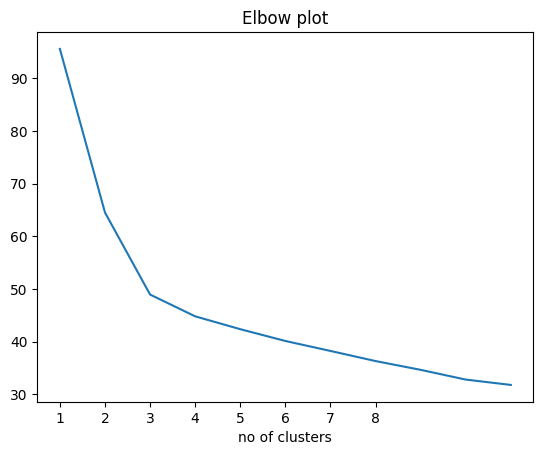

In [108]:
plt.plot(range(1,12),wcss)
plt.xticks(range(1,9))
plt.title('Elbow plot')
plt.xlabel('no of clusters')
plt.show()

# implementing Kmeans clustering

In [109]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,init = "k-means++")
X['category'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# PCA for Dimensionality Reduction and to visualizing clustered data

In [110]:
import plotly.graph_objs as go
import plotly.offline as py

# Reduce dimensionality to 3 dimensions using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.iloc[:, :-1])  # Excluding the 'category' column for visualization

# Create traces for each cluster
traces = []
for category in range(3):
    subset = X_pca[X['category'] == category]
    trace = go.Scatter3d(
        x=subset[:, 0],
        y=subset[:, 1],
        z=subset[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=category,  # Assigning different colors based on the category
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Cluster {category}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='K-means Clustering (PCA Visualization)',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    )
)

# Plot
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)


plotting scatter plot for Alcohol , Malic_Acid, category

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

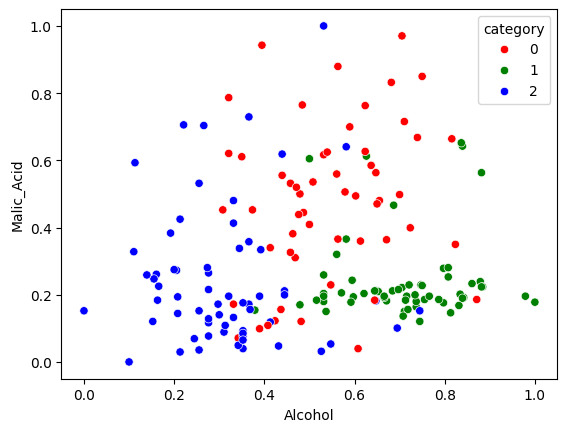

In [111]:
sns.scatterplot(x = 'Alcohol',y = 'Malic_Acid',hue = 'category',data = wine_df,palette=['red','green','blue'])

#3D plot of clusters of alcohol , Malic Acid and Ash

In [112]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans


# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(wine_df[['Alcohol', 'Malic_Acid', 'Ash']])
wine_df['category'] = kmeans.labels_

# Create the 3D scatter plot
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter3d(x=wine_df['Alcohol'], y=wine_df['Malic_Acid'], z=wine_df['Ash'],
                           mode='markers', marker=dict(size=8, color=wine_df['category'], colorscale='Viridis', opacity=0.8), name='Data Points'))

# Add centroids
centroids = kmeans.cluster_centers_
fig.add_trace(go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
                           mode='markers', marker=dict(size=12, color='red', symbol='x', line=dict(color='black', width=2)), name='Centroids'))

# Set labels, title, and legend
fig.update_layout(scene=dict(xaxis_title='Alcohol', yaxis_title='Malic Acid', zaxis_title='Ash'),
                  title='Interactive 3D Scatter Plot with Centroids (K-means)', legend=dict(yanchor="top",y=0.99, xanchor="left", x=0.01))



# Update legend labels
fig.update_layout(scene=dict(xaxis=dict(title='Alcohol'), yaxis=dict(title='Malic Acid'), zaxis=dict(title='Ash')))

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

